Antrame laboratoriniame darbe buvo duota spyruoklės svyravimų lygtis $\frac{d^{2}}{d t^{2}} x{\left(t \right) + 2h \frac{d}{d t} x{\left(t \right)} + k^2x{\left(t \right)}=a\sin\left(wt\right)}$. Taip pat kiekviename variante buvo nurodyti parametrai $h$, $k$, $a$, $w$. Reikėjo kiekvienam variantui rasti šios lygties sprendinius duotoms pradinėms sąlygoms, pavyzdžiui:

* $x(0)=1, x'(0)=1$

* $x(0)=1, x'(0)=0$

* $x(0)=1, x'(0)=-1$

### Sprendimas
Iš pradžių aprašome kintamuosius:

In [34]:
from sympy import*
init_printing(use_unicode=True)
t, h, k, a, w = symbols('t h k a w')
x = Function('x')
eq = x(t).diff(t,t) + 2*h*x(t).diff(t) + k**2*x(t) - a*sin(w*t)

Dabar aprašome metodą, kuris automatiškai detaliai išsprendžia kiekvieną variantą:

In [84]:
def spręsk_detaliai(parametrai, icss=[[[0,1],[0,1]],[[0,1],[0,0]],[[0,1],[0,-1]]]):
    '''Sprendžia lygtį x''+2hx'+k^2x=asin(wt) su parametrais h, k, a, w'''
    
    reikšmės = dict(zip([h,k,a,w], parametrai)) #pavyzdžiui: {h:2,k:1,a:0,w:0}
    nauja_lygtis = eq.subs(reikšmės)
    sprendinys = dsolve(nauja_lygtis)
    sprendinio_išvestinė = Eq(diff(x(t)), sprendinys.rhs.diff(t))
    
    print(f'Lygtis atveju (h, k, a, w) = {parametrai}:')
    display(nauja_lygtis)
    print(f'Lygties sprendinys:')
    display(sprendinys)
    print(f'Lygties sprendinio išvestinė:')
    display(sprendinio_išvestinė)
    for ics in icss:
        sąlyga1 = Eq(sprendinys.rhs.subs(t, ics[0][0]), ics[0][1])
        sąlyga2 = Eq(sprendinio_išvestinė.rhs.subs(t, ics[1][0]), ics[1][1])
        konstantos = solve([sąlyga1,sąlyga2])
        tikslus_sprendinys = sprendinys.subs(konstantos)
        print(f'Tarkime x({ics[0][0]})={ics[0][1]} ir x({ics[1][0]})={ics[1][1]}.')       
        print('Tada pirma sąlyga:')
        display(sąlyga1)
        print('Tada antra sąlyga:')
        display(sąlyga2)
        print('Konstantų reikšmės:')
        display(konstantos)
        print(f'Tikslusis sprendinys:')
        display(tikslus_sprendinys)
    print('-'*120)

Šis metodas išsprendė visus uždavinius. Taupant vietą parodysiu tik kaip sprendė paskutinį:

Lygtis atveju (h, k, a, w) = (0, 1, 2, 1):


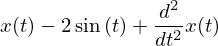

Lygties sprendinys:


Lygties sprendinio išvestinė:


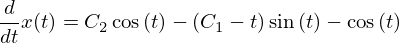

Tarkime x(0)=1 ir x(0)=1.
Tada pirma sąlyga:


Tada antra sąlyga:


Konstantų reikšmės:


Tikslusis sprendinys:


Tarkime x(0)=1 ir x(0)=0.
Tada pirma sąlyga:


Tada antra sąlyga:


Konstantų reikšmės:


Tikslusis sprendinys:


Tarkime x(0)=1 ir x(0)=-1.
Tada pirma sąlyga:


Tada antra sąlyga:


Konstantų reikšmės:


Tikslusis sprendinys:


------------------------------------------------------------------------------------------------------------------------


In [85]:
uždaviniai = {1:(2,1,0,0), 2:(1,1,0,0), 3:(0.5,1,0,0), 4:(0,1,0,0), 5:(0.5,1,2,3), 6:(1,1,2,3), 6:(1,1,2,3), 7:(2,1,2,3), 8:(0,1,2,3), 9:(0,1,2,1)}
for užduotis in [list(uždaviniai)[-1]]:
    spręsk_detaliai(uždaviniai[užduotis])

Remiantis ankstesniu laboratoriniu darbu taip pat galima analogiškai aprašyti ir atskirų sprendinių braižymą:

In [105]:
def brėžk_kreivę(parametrai, ics, fig=None, ax=None, xlim=[-20, 20], ylim=[-10, 10], step=0.03):
    reikšmės = dict(zip([h,k,a,w], parametrai)) #pavyzdžiui: {h:2,k:1,a:0,w:0}
    nauja_lygtis = eq.subs(reikšmės)
    sprendinys = dsolve(nauja_lygtis)
    sprendinio_išvestinė = Eq(diff(x(t)), sprendinys.rhs.diff(t))
    sąlyga1 = Eq(sprendinys.rhs.subs(t, ics[0][0]), ics[0][1])
    sąlyga2 = Eq(sprendinio_išvestinė.rhs.subs(t, ics[1][0]), ics[1][1])
    konstantos = solve([sąlyga1,sąlyga2])
    tikslus_sprendinys = sprendinys.subs(konstantos)
    
    if fig is None:
        fig = plt.figure(figsize=(12, 2))
    if ax is None:
        ax = fig.gca()
        ax.set_title(f'Lygtis ${latex(nauja_lygtis)}=0$')
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    
    func = np.vectorize(lambdify(t, tikslus_sprendinys.rhs, 'numpy'))
    X = np.arange(*xlim, step)
    ax.plot(X, func(X), label=str(ics)+': $'+latex(tikslus_sprendinys.rhs)+'$')
    return fig, ax

Braižymo pavyzdys:

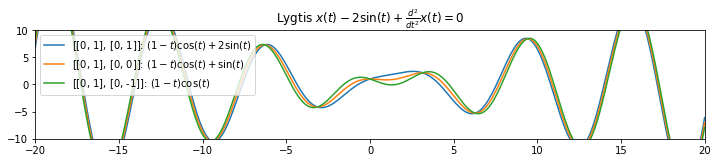

In [106]:
fig, ax = brėžk_kreivę((0,1,2,1), [[0,1],[0,1]])
fig, ax = brėžk_kreivę((0,1,2,1), [[0,1],[0,0]], fig, ax)
fig, ax = brėžk_kreivę((0,1,2,1), [[0,1],[0,-1]], fig, ax)
plt.legend()
plt.show()